# Principal Component Analysis with Cancer Data

In [137]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [171]:
df_bc = pd.read_csv('breast-cancer-wisconsin-data.csv')
df_bc.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [172]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [173]:
df_bc.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [174]:
df_bc.shape

(699, 11)

In [175]:
df_bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [176]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [177]:
df_bc.isnull().count()

ID                             699
ClumpThickness                 699
Cell Size                      699
Cell Shape                     699
Marginal Adhesion              699
Single Epithelial Cell Size    699
Bare Nuclei                    699
Normal Nucleoli                699
Bland Chromatin                699
Mitoses                        699
Class                          699
dtype: int64

In [178]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


In [179]:
print("Rows containing ? in bare nuclei column are : ",(df_bc['Bare Nuclei'].apply(lambda x: not x.isdigit()) == True).sum())

Rows containing ? in bare nuclei column are :  16


In [180]:
df_bc['Bare Nuclei']=df_bc['Bare Nuclei'].apply(lambda x: np.where(x.isdigit(),x,'0'))

In [181]:
df_bc.loc[ df_bc['Bare Nuclei'] == 0, 'Bare Nuclei' ] = df_bc['Bare Nuclei'].mean()

In [182]:
df_bc['Bare Nuclei']=df_bc['Bare Nuclei'].astype('int')

In [183]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [184]:
df_bc[df_bc.duplicated()]

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
208,1218860,1,1,1,1,1,1,3,1,1,2
253,1100524,6,10,10,2,8,10,7,3,3,4
254,1116116,9,10,10,1,10,8,3,3,1,4
258,1198641,3,1,1,1,2,1,3,1,1,2
272,320675,3,3,5,2,3,10,7,1,1,4
338,704097,1,1,1,1,1,1,2,1,1,2
561,1321942,5,1,1,1,2,1,3,1,1,2
684,466906,1,1,1,1,2,1,1,1,1,2


In [185]:
df_bc.drop_duplicates(keep='first',inplace=True) 

In [186]:
df_bc[df_bc.duplicated()]

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class


In [187]:
df_bc.shape

(691, 11)

In [188]:
df_bc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 691 entries, 0 to 698
Data columns (total 11 columns):
ID                             691 non-null int64
ClumpThickness                 691 non-null int64
Cell Size                      691 non-null int64
Cell Shape                     691 non-null int64
Marginal Adhesion              691 non-null int64
Single Epithelial Cell Size    691 non-null int64
Bare Nuclei                    691 non-null int32
Normal Nucleoli                691 non-null int64
Bland Chromatin                691 non-null int64
Mitoses                        691 non-null int64
Class                          691 non-null int64
dtypes: int32(1), int64(10)
memory usage: 62.1 KB


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [189]:
# Check for correlation of variable
df_bc.corr()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.059165,-0.043273,-0.042184,-0.066230,-0.047642,-0.088536,-0.059645,-0.054001,-0.036001,-0.079459
ClumpThickness,-0.059165,1.000000,0.643340,0.653752,0.487949,0.517448,0.590139,0.561076,0.535712,0.350354,0.716938
Cell Size,-0.043273,0.643340,1.000000,0.905420,0.713117,0.747111,0.682668,0.759525,0.727239,0.460064,0.817720
Cell Shape,-0.042184,0.653752,0.905420,1.000000,0.690989,0.714393,0.701406,0.738455,0.724693,0.440592,0.817693
Marginal Adhesion,-0.066230,0.487949,0.713117,0.690989,1.000000,0.608477,0.671459,0.669813,0.602453,0.417167,0.701371
Single Epithelial Cell Size,-0.047642,0.517448,0.747111,0.714393,0.608477,1.000000,0.579921,0.620518,0.634058,0.482644,0.681233
Bare Nuclei,-0.088536,0.590139,0.682668,0.701406,0.671459,0.579921,1.000000,0.669985,0.575672,0.343425,0.815465
Normal Nucleoli,-0.059645,0.561076,0.759525,0.738455,0.669813,0.620518,0.669985,1.000000,0.669059,0.343821,0.756618
Bland Chromatin,-0.054001,0.535712,0.727239,0.724693,0.602453,0.634058,0.575672,0.669059,1.000000,0.427644,0.715540
Mitoses,-0.036001,0.350354,0.460064,0.440592,0.417167,0.482644,0.343425,0.343821,0.427644,1.000000,0.424111


In [157]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

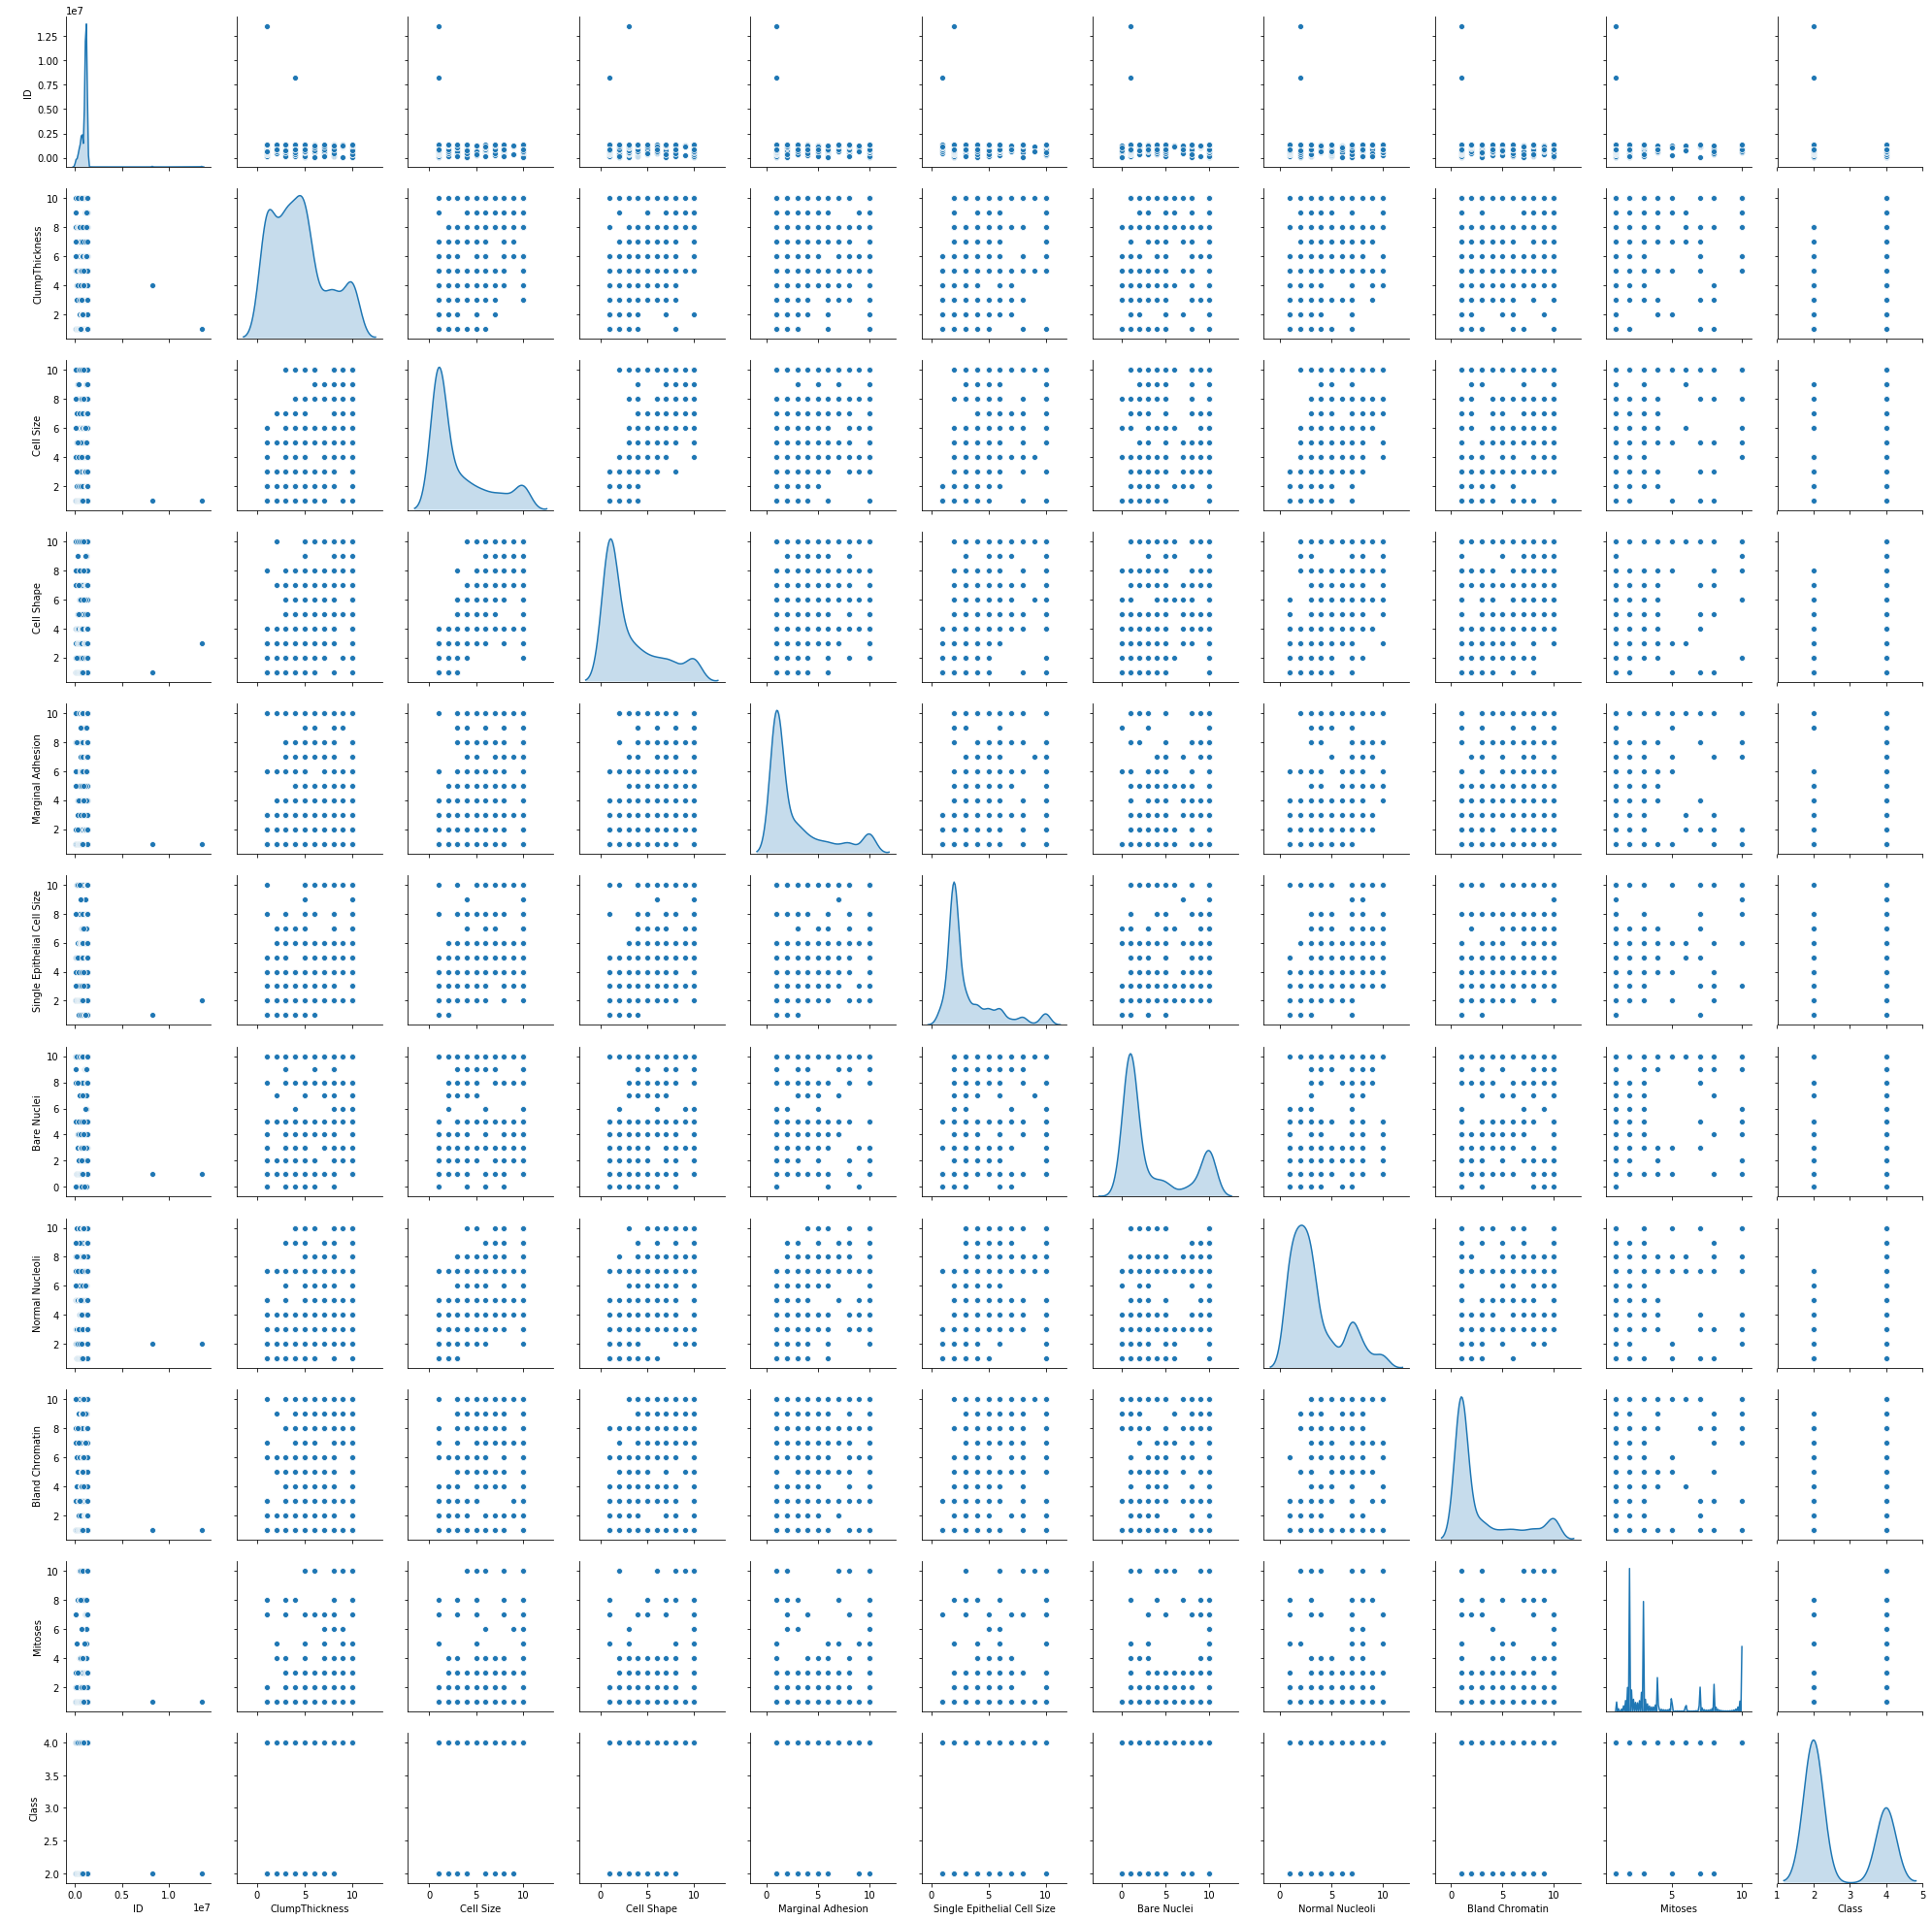

In [158]:
#Let us check for pair plots
sns.pairplot(df_bc, diag_kind='kde')

In [159]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [212]:
updated_df_bc=df_bc.drop(['ID','Class'],axis=1)

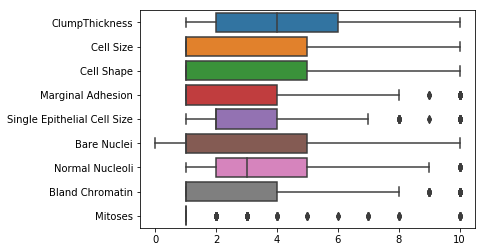

In [213]:
ax = sns.boxplot(data = updated_df_bc,orient='h')

In [214]:
pd.crosstab(updated_df_bc['Marginal Adhesion'],df_bc['Class'])

Class,2,4
Marginal Adhesion,,
1,370,31
2,37,19
3,31,27
4,5,28
5,4,19
6,4,18
7,0,13
8,0,25
9,1,4


In [215]:
updated_df_bc['Marginal Adhesion'] = np.where(updated_df_bc['Marginal Adhesion']>8, 4,updated_df_bc['Marginal Adhesion'])

In [216]:
pd.crosstab(updated_df_bc['Single Epithelial Cell Size'],df_bc['Class'])

Class,2,4
Single Epithelial Cell Size,,
1,44,1
2,360,23
3,29,42
4,7,41
5,5,34
6,2,39
7,3,9
8,2,18
9,0,2


In [217]:
updated_df_bc['Single Epithelial Cell Size'] = np.where(updated_df_bc['Single Epithelial Cell Size']>7, 4,updated_df_bc['Single Epithelial Cell Size'])

In [218]:
pd.crosstab(updated_df_bc['Normal Nucleoli'],df_bc['Class'])

Class,2,4
Normal Nucleoli,,
1,149,2
2,158,7
3,126,35
4,8,32
5,4,30
6,1,9
7,7,64
8,0,28
9,0,11


In [219]:
updated_df_bc['Normal Nucleoli'] = np.where(updated_df_bc['Normal Nucleoli']>9, 6,updated_df_bc['Normal Nucleoli'])

In [220]:
pd.crosstab(updated_df_bc['Bland Chromatin'],df_bc['Class'])

Class,2,4
Bland Chromatin,,
1,397,40
2,30,6
3,12,30
4,1,17
5,2,17
6,4,18
7,2,14
8,4,20
9,1,15


In [221]:
updated_df_bc['Bland Chromatin'] = np.where(updated_df_bc['Bland Chromatin']>8, 4,updated_df_bc['Bland Chromatin'])

In [223]:
pd.crosstab(updated_df_bc['Mitoses'],df_bc['Class'])

Class,2,4
Mitoses,,
1,440,132
2,8,27
3,2,30
4,0,12
5,1,5
6,0,3
7,1,8
8,1,7
10,0,14


In [228]:
updated_df_bc['Mitoses'] = np.where(updated_df_bc['Mitoses']>6, 3,updated_df_bc['Mitoses'])

In [232]:
updated_df_bc['Mitoses'] = np.where((updated_df_bc['Mitoses']>3) & (updated_df_bc['Mitoses']<=6), 2,updated_df_bc['Mitoses'])

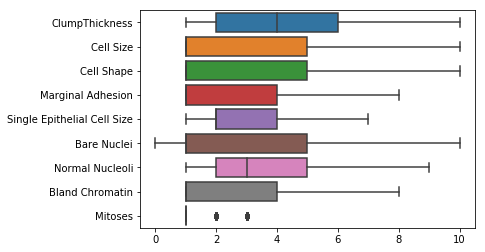

In [233]:
ax = sns.boxplot(data = updated_df_bc,orient='h')

In [0]:
# We could see most of the outliers are now removed.

# Q6 Create a covariance matrix for identifying Principal components

In [234]:
# PCA
# Step 1 - Create covariance matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# importing ploting libraries
import matplotlib.pyplot as plt 
from scipy.stats import zscore
from sklearn import datasets

In [237]:
iris = datasets.load_iris()
X = updated_df_bc
X_std = StandardScaler().fit_transform(X)

C:\Users\besta\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\besta\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [238]:
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00144928 0.64427196 0.65469961 0.49303803 0.53423144 0.59099402
  0.57055627 0.51600742 0.42171345]
 [0.64427196 1.00144928 0.90673173 0.69334195 0.73760001 0.68365726
  0.73850538 0.65762527 0.49693858]
 [0.65469961 0.90673173 1.00144928 0.66132372 0.71447771 0.70242281
  0.71899773 0.63973996 0.47474514]
 [0.49303803 0.69334195 0.66132372 1.00144928 0.64424807 0.64893767
  0.66791349 0.58319823 0.37444248]
 [0.53423144 0.73760001 0.71447771 0.64424807 1.00144928 0.62100047
  0.63735979 0.62033825 0.40727158]
 [0.59099402 0.68365726 0.70242281 0.64893767 0.62100047 1.00144928
  0.6852904  0.58757917 0.43320862]
 [0.57055627 0.73850538 0.71899773 0.66791349 0.63735979 0.6852904
  1.00144928 0.62329131 0.38665702]
 [0.51600742 0.65762527 0.63973996 0.58319823 0.62033825 0.58757917
  0.62329131 1.00144928 0.44489897]
 [0.42171345 0.49693858 0.47474514 0.37444248 0.40727158 0.43320862
  0.38665702 0.44489897 1.00144928]]


# Q7 Identify eigen values and eigen vector

In [0]:
# Step 2- Get eigen values and eigen vector

In [239]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-0.30787434 -0.13421359  0.01282338  0.81112403 -0.16779089 -0.14840379
   0.1258608   0.36372392  0.17549923]
 [-0.37731674  0.04147563  0.73121934  0.05306408 -0.02253432  0.38328864
  -0.27403184 -0.27556028  0.14131327]
 [-0.37268589  0.0495939  -0.67191629  0.13662663 -0.01363543  0.36623576
  -0.38401873 -0.32363151  0.04455379]
 [-0.3306297   0.25712642 -0.05511716 -0.32851889  0.41179979 -0.11141892
  -0.15407496  0.50456352  0.50328   ]
 [-0.33952248  0.14610241 -0.0366497  -0.20617937 -0.19661758  0.49337033
   0.42586064  0.40313359 -0.4399758 ]
 [-0.34070694  0.0837312   0.07911375  0.08274818  0.3974196  -0.42937745
  -0.24989206 -0.0234852  -0.67712384]
 [-0.34658323  0.21662199 -0.04565292 -0.02181598  0.14389059 -0.23429577
   0.66816105 -0.51894591  0.19761525]
 [-0.32295726 -0.02870411 -0.00824576 -0.33721592 -0.73748912 -0.44853548
  -0.18589539 -0.00853045  0.03725538]
 [-0.24260388 -0.91410453 -0.02983398 -0.22163667  0.20094258  0.02579656
   0

# Q8 Find variance and cumulative variance by each eigen vector

In [240]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Variance ", var_exp)
print("Cumulative Variance ", cum_var_exp)

Variance  [65.15109057257267, 8.069440482178583, 5.920095789727646, 4.782437807188207, 4.580655532671619, 3.775515386512506, 3.5942844123881073, 3.1224816477580535, 1.003998369002628]
Cumulative Variance  [ 65.15109057  73.22053105  79.14062684  83.92306465  88.50372018
  92.27923557  95.87351998  98.99600163 100.        ]


# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

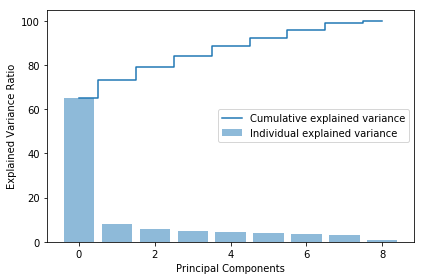

In [243]:
plt.figure(figsize=(6 , 4))
plt.bar(range(9), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(9), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

From above graph I took 3 components as its covering 80% of the data.

In [251]:
X_PCA=PCA(n_components=3)
X_reduced = X_PCA.fit_transform(X)

,PC1,PC2,PC3
0,-3.816320,0.609848,1.887460
1,5.480941,-4.496806,-0.224247
2,-3.998301,-0.774051,0.203153
3,5.804970,3.657368,-1.209621
4,-3.686242,0.251866,0.608246
5,15.455706,0.649236,-2.532240
6,-0.612522,-7.896057,-0.866102
7,-4.417912,0.081815,-0.983692
8,-5.391162,-0.218155,-0.482044
9,-4.008407,0.701695,0.857867


# Q10 Find correlation between components and features

In [257]:
reduced_df_bc = pd.DataFrame(X_reduced, columns=['PC1','PC2','PC3'])
reduced_df_bc.head(10)

,PC1,PC2,PC3
0,-3.816320,0.609848,1.887460
1,5.480941,-4.496806,-0.224247
2,-3.998301,-0.774051,0.203153
3,5.804970,3.657368,-1.209621
4,-3.686242,0.251866,0.608246
5,15.455706,0.649236,-2.532240
6,-0.612522,-7.896057,-0.866102
7,-4.417912,0.081815,-0.983692
8,-5.391162,-0.218155,-0.482044
9,-4.008407,0.701695,0.857867


AttributeError: 'DataFrame' object has no attribute 'feature_names'

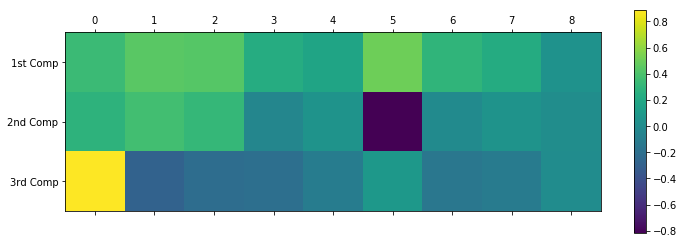

In [258]:
## As told by instructor that its optional to print below heatmap .
##But tried to print
plt.matshow(X_PCA.components_,cmap='viridis')
plt.yticks([0,1,2],['1st Comp','2nd Comp','3rd Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(3),updated_df_bc.feature_names,rotation=65,ha='left')
plt.tight_layout()
plt.show()

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [327]:
df_jokes = pd.read_csv('jokes.csv')
df_jokes.head(10)

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,100,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,47,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,100,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,100,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,72,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


We already have column names .

# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [314]:
ratings=df_jokes.iloc[0:200,1:101]
ratings.head(10)

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,8.16,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


# Q13 Change the column indices from 0 to 99

In [335]:
a=0
for x in ratings.columns:
    ratings = ratings.rename(columns = {x:a}) 
    a=a+1
ratings.head(10)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,0.00,0.00,0.00,0.00,8.59,-9.85,7.72,8.79,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,2.33,0.00,0.00,0.00,0.00
7,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,8.16,...,0.00,4.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


# Q14 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [336]:
ratings = ratings.replace(99,0)
ratings.head(10)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,0.00,0.00,0.00,0.00,8.59,-9.85,7.72,8.79,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,2.33,0.00,0.00,0.00,0.00
7,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,8.16,...,0.00,4.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


# Q15 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [337]:
sc=StandardScaler()
ratings_diff = sc.fit_transform(ratings)
ratings_diff


array([[-1.85701632,  1.67164929, -2.21918089, ..., -0.02685824,
        -0.04144395, -0.16095388],
       [ 0.78949409, -0.1802773 ,  1.3727099 , ...,  0.07059963,
        -1.36765027,  0.16746078],
       [-0.11788091, -0.12112987, -0.0532842 , ..., -0.02685824,
        -0.04144395, -0.16095388],
       ...,
       [ 0.46479617, -0.89412566, -0.3156133 , ..., -0.23610604,
         0.18266036, -0.02590486],
       [-0.11788091, -0.12112987, -0.0532842 , ..., -0.02685824,
        -0.04144395, -0.16095388],
       [ 1.12308784, -1.60593445, -1.07569506, ..., -0.02685824,
        -0.04144395, -0.16095388]])

### Popularity based recommendation system

# Q16  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [338]:
df_ratings_diff = pd.DataFrame(ratings_diff.mean(axis = 0))   

In [339]:
df_ratings_diff['joke_ID']=ratings.columns

In [340]:
df_ratings_diff = df_ratings_diff.set_index('joke_ID')

In [341]:
df_ratings_diff.nlargest(10, [0]) 

,0
joke_ID,
53,1.154632e-16
20,1.110223e-16
47,7.771561e-17
49,7.105427e-17
64,7.105427e-17
99,5.773160e-17
23,4.440892e-17
73,4.440892e-17
83,4.440892e-17


So from above we got the ID's for the top 10 joke